In [1]:
# import os module
import os

# import AUTO modules
from auto import AUTOCommands as ac
from auto import AUTOclui as acl
from auto import interactiveBindings as ib
from auto import runAUTO as ra

# import plotting tools
import matplotlib as mpl
from matplotlib import pyplot as plt

# virtual display to use AUTO plot function
from pyvirtualdisplay import Display
from IPython.display import display as display
from PIL import Image
disp = Display(visible=0, size=(1366,768))
disp.start()

In [2]:
# use working directory for demo to avoid clutter
folder = '/auto/workspace/demos/demo'
os.chdir(folder)

In [6]:
# copy demo into current directory
ac.copydemo('um3')

# start AUTO with runner object
runner = ra.runAUTO()

print("\n***Grow an initial orbit by continuation***")
init = ac.run(e='um3',
           unames = {1:'x',2:'y',3:'z'},
           parnames = {1:'theta',2:'eps',3:'r0',4:'r1',11:'Period'},
           NDIM=3,IPS=4,ILP=0,ISP=0,ICP=['Period','r1'],
           NTST=60,IPLT=3,NBC=4,
           DS=5e-2,DSMIN=1e-5,DSMAX=1e1,
           THL={'Period':0.},
           UZSTOP={'r1':1.},
           NPAR=11, runner=runner)
ac.save(init, '1')

print("\n***Decrease the value of the problem parameter eps***")
decr = ac.run(init,ICP=['eps','Period'],DS='-',DSMAX=1.0,UZSTOP={'eps':0.01}, runner=runner)
ac.save(decr, '2')

print("\n***Part 1 of the unstable manifold***")
startman = ac.load(decr, ICP=['theta','Period'],NPR=1,
                DS=5e-2,DSMIN=1e-5,DSMAX=1e0,
                UZSTOP={'theta':[1.25,-0.75],'Period':1e4}, runner=runner)
part1 = ac.run(startman, runner=runner)

print("\n***Part 2 of the unstable manifold")
part2 = ac.run(startman,DS='-', runner=runner)

print("\n***Merge, relabel and save the orbits***")
ac.save(ac.relabel(ac.merge(part1+part2)),'3')

Copying demo um3 ... done

***Grow an initial orbit by continuation***
gfortran -fopenmp -O -c um3.f90 -o um3.o
gfortran -fopenmp -O um3.o -o um3.exe /auto/lib/*.o
Starting um3 ...

  BR    PT  TY  LAB     Period        MAX z         MAX x         MAX y         MAX z           r1      
   1     1  EP    1   1.00000E-04   0.00000E+00   1.83697E-18   3.00000E-02   0.00000E+00   3.00000E-02
   1    22  UZ    2   3.45109E+00   1.63220E-02   1.83697E-18   9.41220E-01   1.63220E-02   9.99998E-01

 Total Time    0.499E-01
um3 ... done
Saving to b.1, s.1, and d.1 ... done

***Decrease the value of the problem parameter eps***
Starting um3 ...

  BR    PT  TY  LAB      eps          MAX z         MAX x         MAX y         MAX z         Period    
   1     6  UZ    3   1.00005E-02   1.23889E-02   1.83697E-18   9.55702E-01   1.23889E-02   3.46458E+00

 Total Time    0.248E-01
um3 ... done
Saving to b.2, s.2, and d.2 ... done

***Part 1 of the unstable manifold***
Runner configured
Starting um3 .

   1    17       20  -1.47670E-04   1.28846E-01   3.62168E-01   9.94368E-01   1.28846E-01   2.41566E+02
   1    18       21  -1.47670E-04   1.97015E-01   4.50438E-01   9.70404E-01   1.97015E-01   2.52016E+02
   1    19       22  -1.47670E-04   3.07211E-01   5.71026E-01   8.51247E-01   3.07211E-01   2.57387E+02
   1    20       23  -1.47670E-04   3.75400E-01   6.38904E-01   7.14625E-01   3.75400E-01   2.58441E+02
   1    21       24  -1.47670E-04   4.44896E-01   7.11419E-01   5.48798E-01   4.44896E-01   2.58935E+02
   1    22       25  -1.47670E-04   5.02914E-01   7.89662E-01   3.51434E-01   5.02914E-01   2.59124E+02
   1    23       26  -1.47670E-04   5.39066E-01   8.35480E-01   1.06663E-01   5.39066E-01   2.59034E+02
   1    24       27  -1.47670E-04   5.17040E-01   8.26314E-01  -2.78351E-05   5.17040E-01   2.58517E+02
   1    25       28  -1.47670E-04   4.06785E-01   7.50385E-01  -2.78351E-05   4.06785E-01   2.57024E+02
   1    26       29  -1.47670E-04   3.63572E-01   7.19875E-01  -

   1    96       99  -5.28859E-03   1.74896E-02   3.19567E-01  -9.96693E-04   1.74896E-02   6.89057E+00
   1    97      100  -6.57799E-03   1.74742E-02   3.19503E-01  -1.23957E-03   1.74742E-02   6.66689E+00
   1    98      101  -8.09166E-03   1.74586E-02   3.19439E-01  -1.52459E-03   1.74586E-02   6.45565E+00
   1    99      102  -9.84552E-03   1.74428E-02   3.19373E-01  -1.85465E-03   1.74428E-02   6.25637E+00
   1   100      103  -1.18519E-02   1.74261E-02   3.19304E-01  -2.23196E-03   1.74261E-02   6.06862E+00
   1   101      104  -1.41187E-02   1.74084E-02   3.19230E-01  -2.65783E-03   1.74084E-02   5.89196E+00
   1   102      105  -1.66495E-02   1.73891E-02   3.19150E-01  -3.13263E-03   1.73891E-02   5.72600E+00
   1   103      106  -1.94428E-02   1.73678E-02   3.19062E-01  -3.65576E-03   1.73678E-02   5.57028E+00
   1   104      107  -2.24930E-02   1.73439E-02   3.18963E-01  -4.22572E-03   1.73439E-02   5.42437E+00
   1   105      108  -2.57908E-02   1.73171E-02   3.18851E-01  -

   1   175      178  -4.20387E-01   9.46154E-03   2.72050E-01  -1.43887E-02   9.46154E-03   4.20384E+00
   1   176      179  -4.25559E-01   9.42178E-03   2.71654E-01  -1.35257E-02   9.42178E-03   4.26564E+00
   1   177      180  -4.30639E-01   9.38536E-03   2.71287E-01  -1.26643E-02   9.38536E-03   4.33137E+00
   1   178      181  -4.35618E-01   9.35214E-03   2.70949E-01  -1.18075E-02   9.35214E-03   4.40132E+00
   1   179      182  -4.40486E-01   9.32199E-03   2.70637E-01  -1.09585E-02   9.32199E-03   4.47580E+00
   1   180      183  -4.45233E-01   9.29475E-03   2.70353E-01  -1.01208E-02   9.29475E-03   4.55516E+00
   1   181      184  -4.49848E-01   9.27028E-03   2.70095E-01  -9.29779E-03   9.27028E-03   4.63976E+00
   1   182      185  -4.54318E-01   9.24841E-03   2.69862E-01  -8.49315E-03   9.24841E-03   4.73002E+00
   1   183      186  -4.58630E-01   9.22897E-03   2.69652E-01  -7.71063E-03   9.22897E-03   4.82637E+00
   1   184      187  -4.62769E-01   9.21178E-03   2.69465E-01  -

   1   254      257  -5.00148E-01   5.74379E-02   8.22956E-02   1.19008E-02   5.74379E-02   2.12136E+02
   1   255      258  -5.00148E-01   6.40816E-02   6.90276E-02   1.41157E-02   6.40816E-02   2.18094E+02
   1   256      259  -5.00148E-01   7.09610E-02   5.57905E-02   1.65613E-02   7.09610E-02   2.23806E+02
   1   257      260  -5.00148E-01   7.80155E-02   4.26633E-02   1.92275E-02   7.80155E-02   2.29306E+02
   1   258      261  -5.00148E-01   8.51763E-02   2.97339E-02   2.20946E-02   8.51763E-02   2.34627E+02
   1   259      262  -5.00148E-01   9.23658E-02   1.70981E-02   2.51388E-02   9.23658E-02   2.39802E+02
   1   260      263  -5.00148E-01   9.95026E-02   4.85790E-03   2.83280E-02   9.95026E-02   2.44859E+02
   1   261      264  -5.00148E-01   1.06500E-01  -6.88130E-03   3.16206E-02   1.06500E-01   2.49829E+02
   1   262      265  -5.00148E-01   1.13269E-01  -1.80151E-02   3.49689E-02   1.13269E-01   2.54740E+02
   1   263      266  -5.00148E-01   1.19726E-01  -2.84448E-02   

   1   333      336  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   1.59742E+03
   1   334      337  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   1.66753E+03
   1   335      338  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   1.74242E+03
   1   336      339  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   1.82252E+03
   1   337      340  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   1.90834E+03
   1   338      341  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   2.00045E+03
   1   339      342  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   2.09947E+03
   1   340      343  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   2.20614E+03
   1   341      344  -5.00148E-01   1.62862E-01  -3.00000E-02   6.57248E-02   1.62862E-01   2.32127E+03
   1   342      345  -5.00148E-01   1.62862E-01  -3.00000E-02   

Created plot


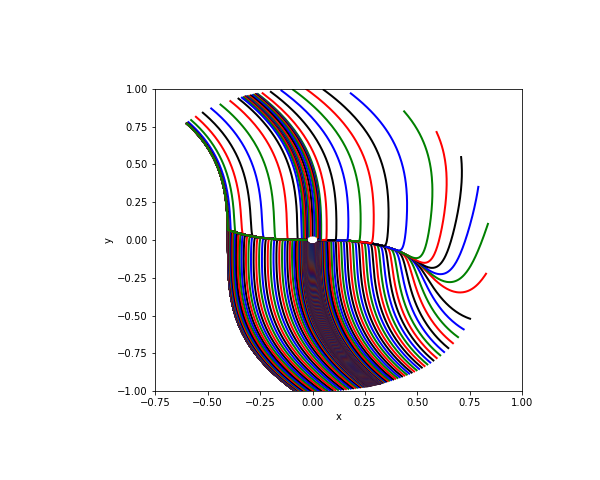

Created plot


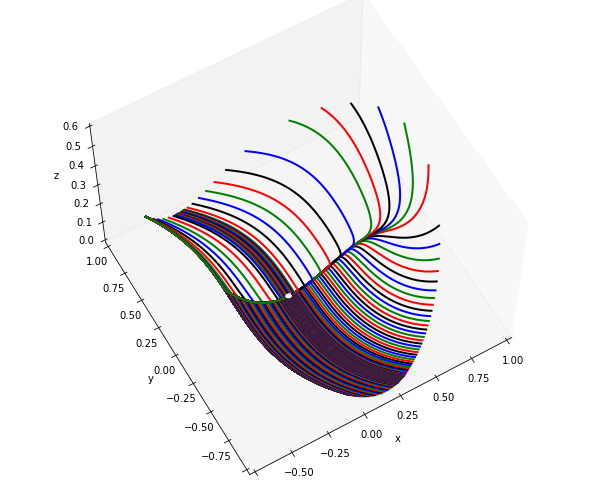

In [12]:
# plot phase portrait

p = ac.plot('3')
p.config(type='solution')
p.config(grid=False)
p.config(solution_x='x', solution_y='y')
p.config(label=list(range(1,412)))
p.savefig('b.png')
display(Image.open('b.png'))

p = ac.plot('3')
p.config(type='solution')
p.config(grid=False)
p.config(solution_x='x', solution_y='y', solution_z='z')
p.config(azimuth=-120, elevation=60)
p.config(label=list(range(1,412)))
p.savefig('b.png')
display(Image.open('b.png'))

In [13]:
# clean up files

ac.clean()
ac.delete('1')
ac.delete('2')
ac.delete('3')

Deleting fort.* *.o *.exe *.*~ ... done
Deleting b.1 ... done
Deleting s.1 ... done
Deleting d.1 ... done
Deleting b.2 ... done
Deleting s.2 ... done
Deleting d.2 ... done
Deleting b.3 ... done
Deleting s.3 ... done
Deleting d.3 ... done
